CVFTesting will be deleted once testing is complete on the CVF class

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sax
import jax.numpy as jnp
from jax import config
config.update("jax_enable_x64", True)


from simphony.libraries import ideal
from simphony.utils import dict_to_matrix

from simphony.time_domain.pole_residue_model import CVFModelBaseband,IIRModelBaseband
from simphony.time_domain.utils import pole_residue_to_time_system, smooth_rectangular_pulse


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


<class 'dict'>
Estimator: 4.958503429378404
Estimator: 165.97946400098772
Estimator: 10.138450446331097
Estimator: 6.9035971500029945
Estimator: 1.5588766574298571


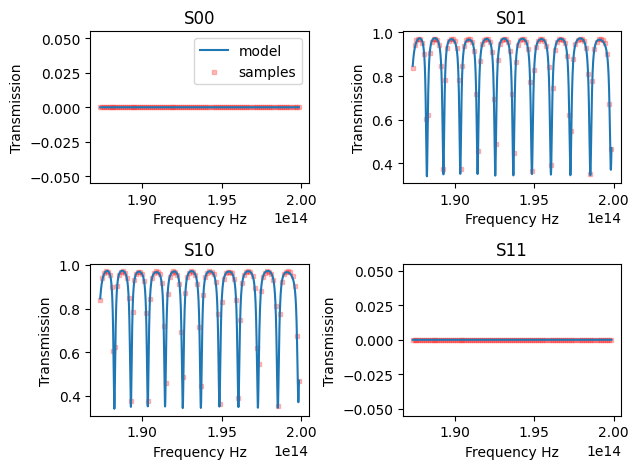

In [2]:
netlist = {
    "instances": {
        "wg": "waveguide",
        "hr": "half_ring",
    },
    "connections": {
        "hr,o2":"wg,o0",
        "hr,o3":"wg,o1",
    },
    "ports":{
        "o0":"hr,o0",
        "o1":"hr,o1",
    }
}
circuit, info = sax.circuit(
    netlist=netlist,
    models={
        "waveguide": ideal.waveguide,
        "half_ring": ideal.coupler,
    }
)

num_measurements = 100
model_order =50
wvl = np.linspace(1.5, 1.6, num_measurements)
s = circuit(wl=wvl, wg={"length": 77.0, "loss": 100})
print(type(s))
model = CVFModelBaseband(wvl,s,50)
model.plot_frequency_domain_model()

In [4]:
N = int(1000)
T = 2e-11
t = jnp.linspace(0, T, N)
sig = jnp.exp(1j*2*np.pi*t*0)

impulse_pass = {
    'o0': sig,
    'o1': jnp.zeros((N), dtype=complex)
                }
tsys = pole_residue_to_time_system(model,t)
output = tsys.response(impulse_pass)

t_out, y_out = output

plt.title("Time Response")
plt.xlabel("Time")
plt.ylabel("E-field Amplitude")

plt.plot(t_out, np.abs(y_out)**2,'red')
print(f"Max value of y_out: {np.max(np.abs(y_out))}")
print(f"Min value of y_out: {np.min(np.abs(y_out))}")





[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


KeyboardInterrupt: 

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


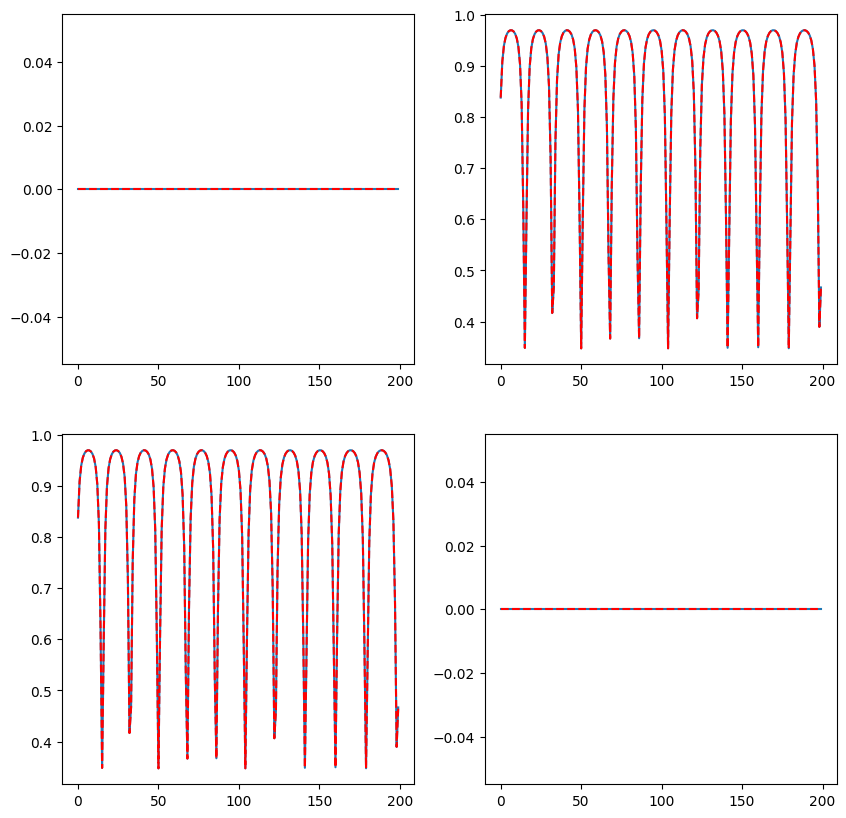

/home/m1400073/miniconda3/envs/PythonX/lib/python3.11/site-packages/scipy/signal/_ltisys.py:3135: ComplexWarning: Casting complex values to real discards the imaginary part
  xout[i+1, :] = (np.dot(system.A, xout[i, :]) +
/home/m1400073/miniconda3/envs/PythonX/lib/python3.11/site-packages/scipy/signal/_ltisys.py:3137: ComplexWarning: Casting complex values to real discards the imaginary part
  yout[i, :] = (np.dot(system.C, xout[i, :]) +
/home/m1400073/miniconda3/envs/PythonX/lib/python3.11/site-packages/scipy/signal/_ltisys.py:3141: ComplexWarning: Casting complex values to real discards the imaginary part
  yout[out_samples-1, :] = (np.dot(system.C, xout[out_samples-1, :]) +


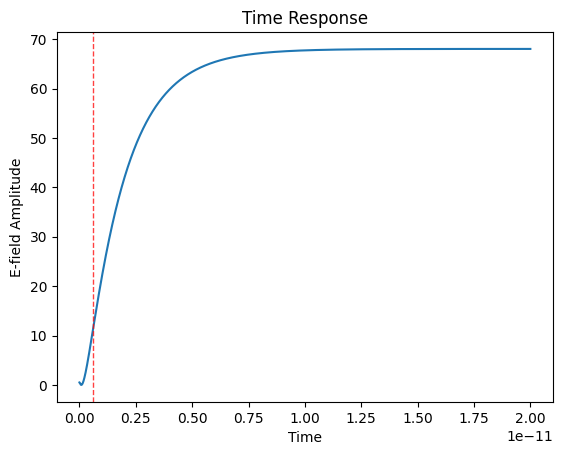

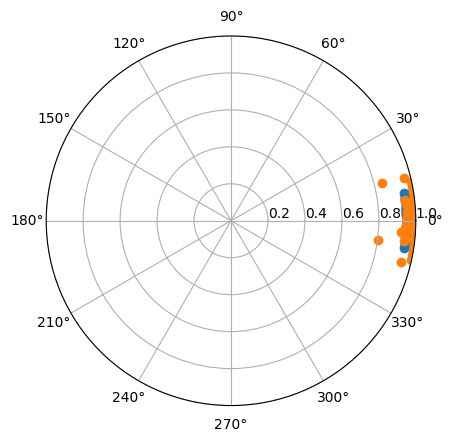

In [2]:
netlist = {
    "instances": {
        "wg": "waveguide",
        "hr": "half_ring",
    },
    "connections": {
        "hr,o2":"wg,o0",
        "hr,o3":"wg,o1",
    },
    "ports":{
        "o0":"hr,o0",
        "o1":"hr,o1",
    }
}
circuit, info = sax.circuit(
    netlist=netlist,
    models={
        "waveguide": ideal.waveguide,
        "half_ring": ideal.coupler,
    }
)

num_measurements = 200
model_order =50
center_wvl = 1.548
wvl = np.linspace(1.5, 1.6, num_measurements)
s = circuit(wl=wvl, wg={"length": 77.0, "loss": 100})
S = np.asarray(dict_to_matrix(s))
model = IIRModelBaseband(wvl,center_wvl,S,50)
model.plot()
model.plot_time_response()
model.plot_poles()

In [6]:
N = int(1000)
T = 2e-11
t = np.arange(0, T, 1/model.sampling_freq)
sig = np.exp(1j*2*np.pi*t*0)
sig = sig.reshape(-1, 1)

impulse = np.hstack([np.real(sig), np.imag(sig)])
# impulse[N//2:] = 0
# impulse = smooth_rectangular_pulse(t, 0, T)
# impulse = impulse.reshape(-1,1)
# impulse = np.hstack([np.real(impulse), np.imag(impulse)])

tsys = pole_residue_to_time_system(model,t)

output = tsys.response(impulse)

t_out, y_out = output

plt.title("Time Response")
plt.xlabel("Time")
plt.ylabel("E-field Amplitude")

plt.plot(t_out, np.abs(y_out)**2,'red')
print(f"Max value of y_out: {np.max(np.abs(y_out))}")
print(f"Min value of y_out: {np.min(np.abs(y_out))}")

plt.plot(t, impulse,'green')

IndexError: index -1 is out of bounds for axis 0 with size 0